# 보스턴 집값 예측

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


In [6]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


* CRIM - Town 당 인당 범죄율
* ZN - 25,000 평방피트 이상의 주거용 토지 비율
* INDUS - 도시 당 비소매 사업지 비율
* CHAS - 찰스 강 더미 변수 (강 가장자리인 경우 1; 그렇지 않으면 0)
* NOX - 질소 산화물 농도 (1000만 분의 1 단위)
* RM - 주거 당 평균 방 수
* AGE - 1940년 이전에 건설된 소유주 거주 단위 비율
* DIS - 보스턴 고용 센터까지의 가중 거리
* RAD - 방사형 고속도로 접근성 지수
* TAX - 10,000달러당 부동산 세율
* PTRATIO - 도시 당 학생 대 교사 비율
* B - 1000(Bk - 0.63)^2, 여기서 Bk는 도시 당 흑인 비율
* LSTAT - 인구의 하위 계층 비율 (%)
* MEDV - 소유주 거주 주택의 중간 가치 (1,000달러 단위)

## 데이터 전처리

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 결측치 처리

In [9]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df[df.CRIM.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
53,NaN,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
115,NaN,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6,432,17.8,344.91,15.76,18.3
183,NaN,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5
191,NaN,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
196,NaN,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
229,NaN,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
236,NaN,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,25.1
241,NaN,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1
262,NaN,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8


In [11]:
df[df.ZN.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
92,0.04203,NaN,15.04,0.0,0.4640,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9
118,0.13058,NaN,10.01,0.0,0.5470,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
133,0.32982,NaN,NaN,0.0,0.6240,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4
146,2.15505,NaN,19.58,0.0,0.8710,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
157,1.22358,NaN,19.58,0.0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
167,1.80028,NaN,19.58,0.0,0.6050,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8
186,0.05602,NaN,2.46,0.0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
205,0.13642,NaN,10.59,0.0,0.4890,5.891,22.3,3.9454,4,277,18.6,396.90,10.87,22.6
210,0.17446,NaN,10.59,1.0,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
238,0.08244,NaN,4.93,0.0,0.4280,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7


### 결측치 처리

In [12]:
from sklearn.impute import KNNImputer

In [13]:
imputer = KNNImputer(n_neighbors=5)

In [14]:
data_filled = imputer.fit_transform(df)

In [15]:
df = pd.DataFrame(data_filled, columns=df.columns)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 상관 관계

* 연속형 데이터(숫자)에 대해서만 상관관계 분석이 가능하다
* -1에서 1사이의 값을 가진다
    * 0.7 보다 클 경우 강한 양의 상관 관계(하나가 증가할 경우 다른 하나는 감소)
    * -0.7 보다 작을 경우 강한 음의 상관 관계(하나가 증가할 경우 다른 하나는 감소)
* 인과 관계를 의미하지는 않음

In [17]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.203517,0.413158,-0.050382,0.427435,-0.216636,0.358330,-0.383799,0.635177,0.591760,0.294751,-0.382977,0.455716,-0.390334
ZN,-0.203517,1.000000,-0.539496,-0.045208,-0.514928,0.317879,-0.566549,0.656519,-0.311546,-0.314049,-0.403357,0.176629,-0.411853,0.365536
INDUS,0.413158,-0.539496,1.000000,0.061336,0.764589,-0.391171,0.647053,-0.712453,0.597221,0.722121,0.386506,-0.358157,0.601298,-0.484071
CHAS,-0.050382,-0.045208,0.061336,1.000000,0.078602,0.101931,0.087852,-0.098552,0.006915,-0.026173,-0.105317,0.052684,-0.049508,0.178911
NOX,0.427435,-0.514928,0.764589,0.078602,1.000000,-0.302188,0.726110,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590200,-0.427321
RM,-0.216636,0.317879,-0.391171,0.101931,-0.302188,1.000000,-0.241267,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.611888,0.695360
AGE,0.358330,-0.566549,0.647053,0.087852,0.726110,-0.241267,1.000000,-0.742805,0.455810,0.508002,0.266968,-0.275884,0.601929,-0.380235
DIS,-0.383799,0.656519,-0.712453,-0.098552,-0.769230,0.205246,-0.742805,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496351,0.249929
RAD,0.635177,-0.311546,0.597221,0.006915,0.611441,-0.209847,0.455810,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.489581,-0.381626
TAX,0.591760,-0.314049,0.722121,-0.026173,0.668023,-0.292048,0.508002,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.545798,-0.468536


<Axes: >

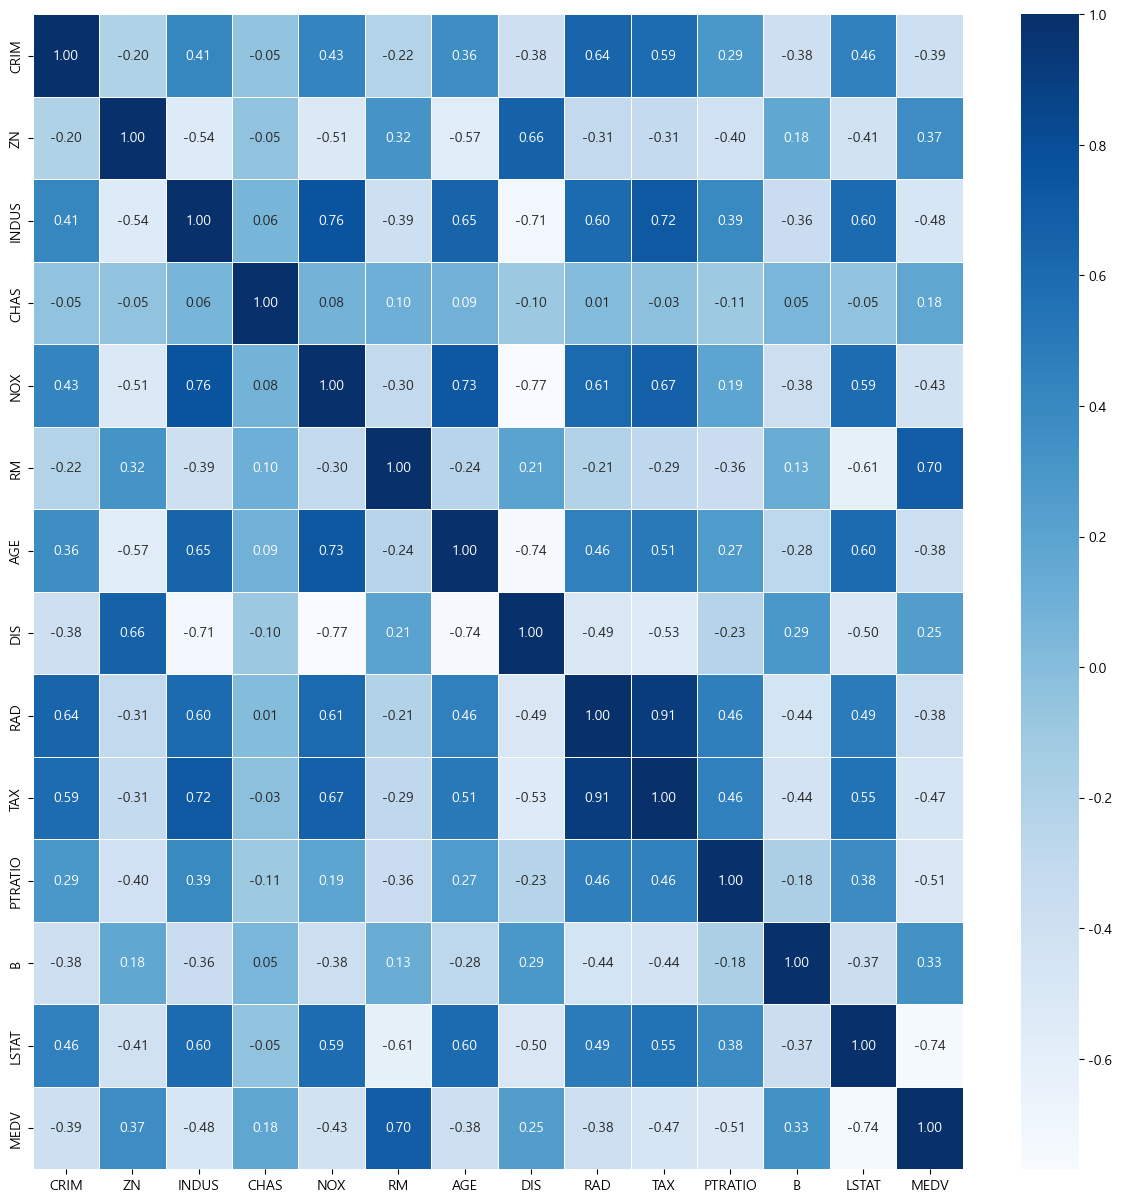

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidth=.5,cmap='Blues')

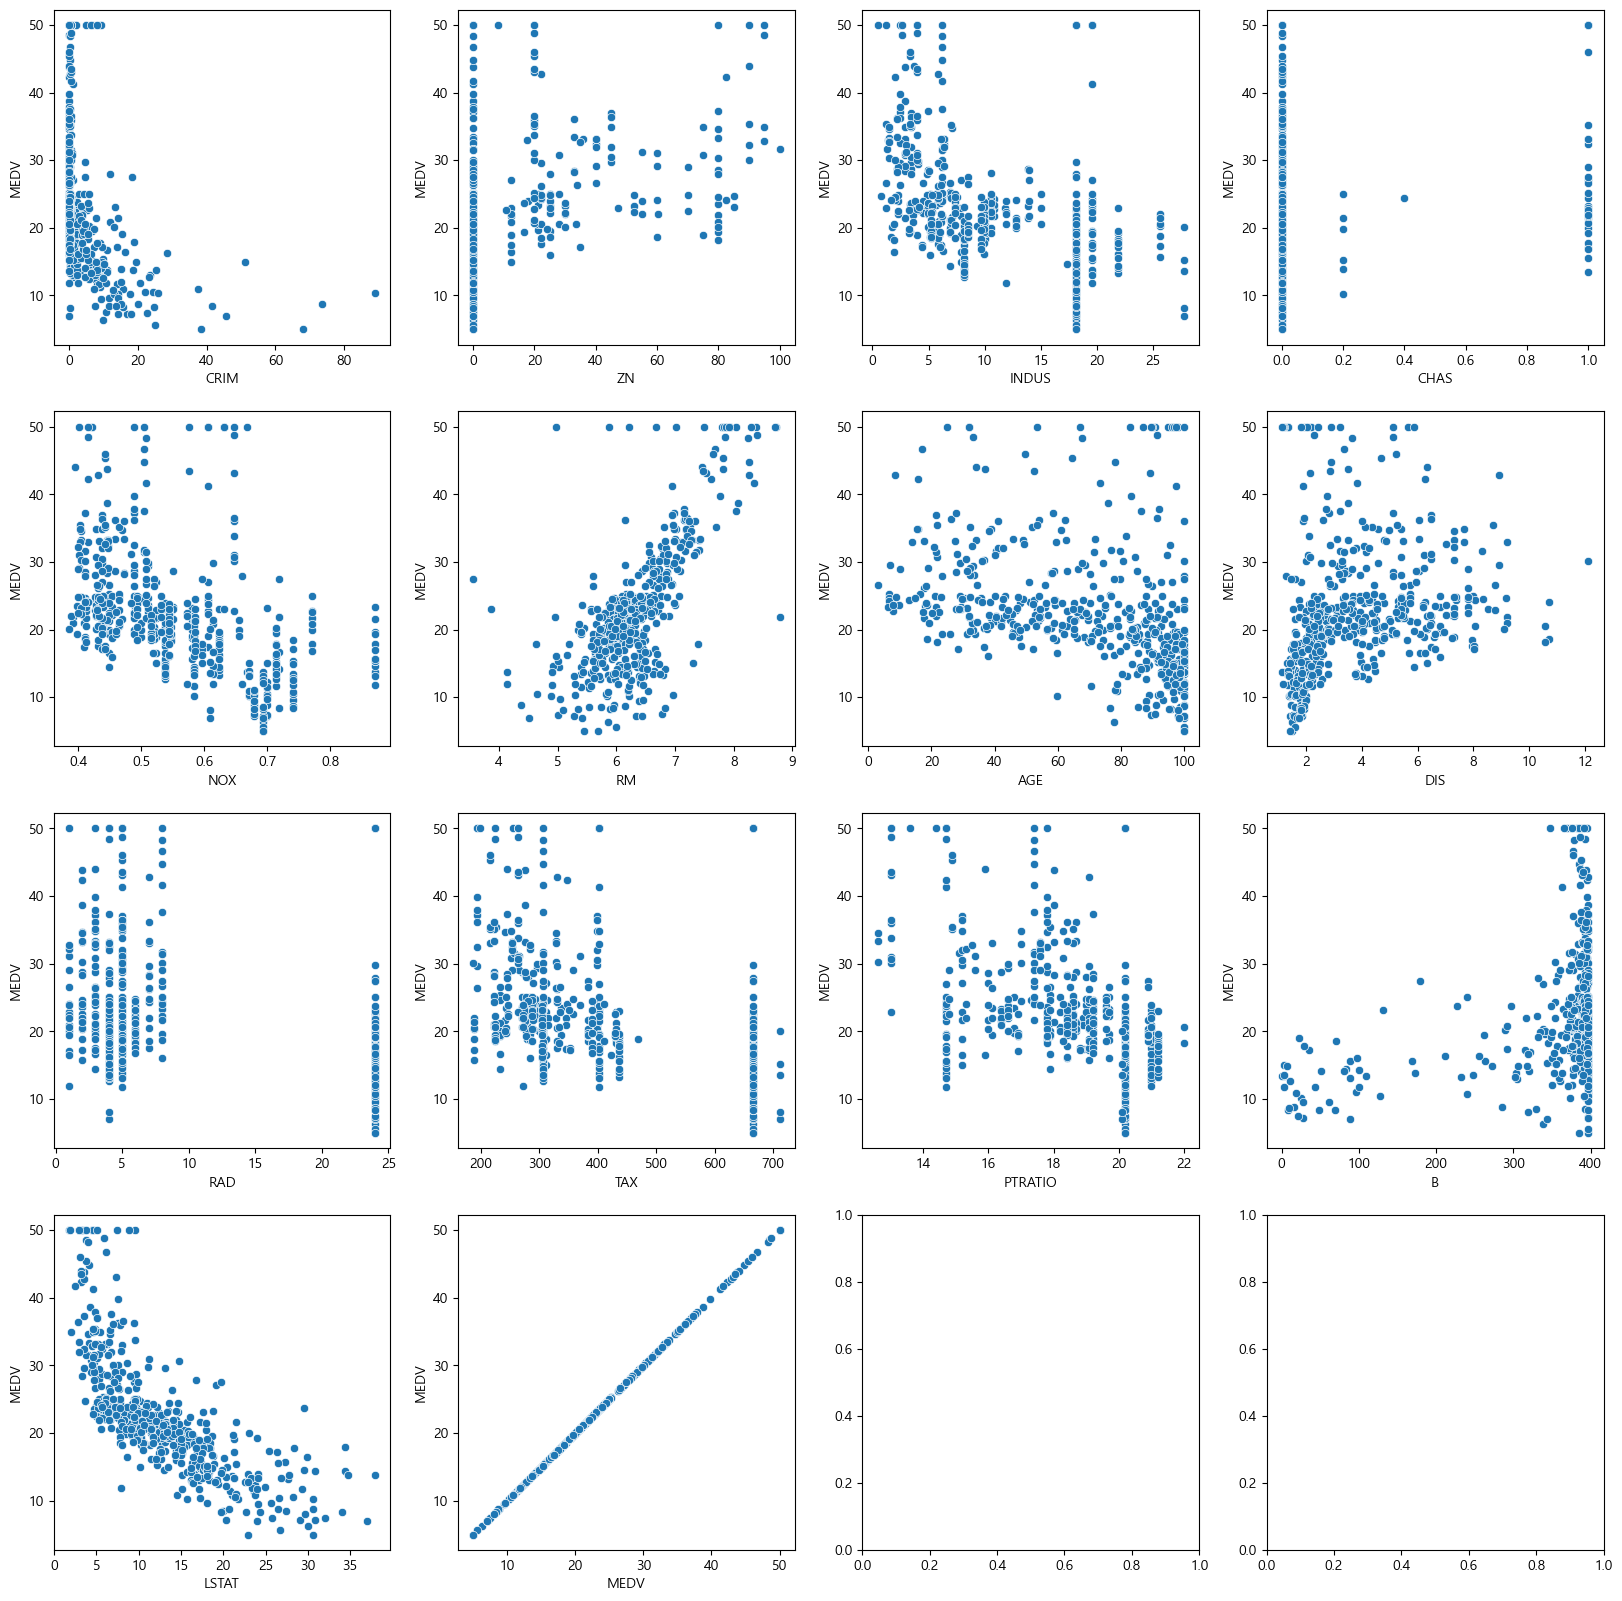

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
#sns.scatterplot(data=df, x=df.CRIM, y=df.MEDV)
for i, col_name in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(data=df, x=col_name, y=df.MEDV, ax=ax)

### 기타 데이터 분석

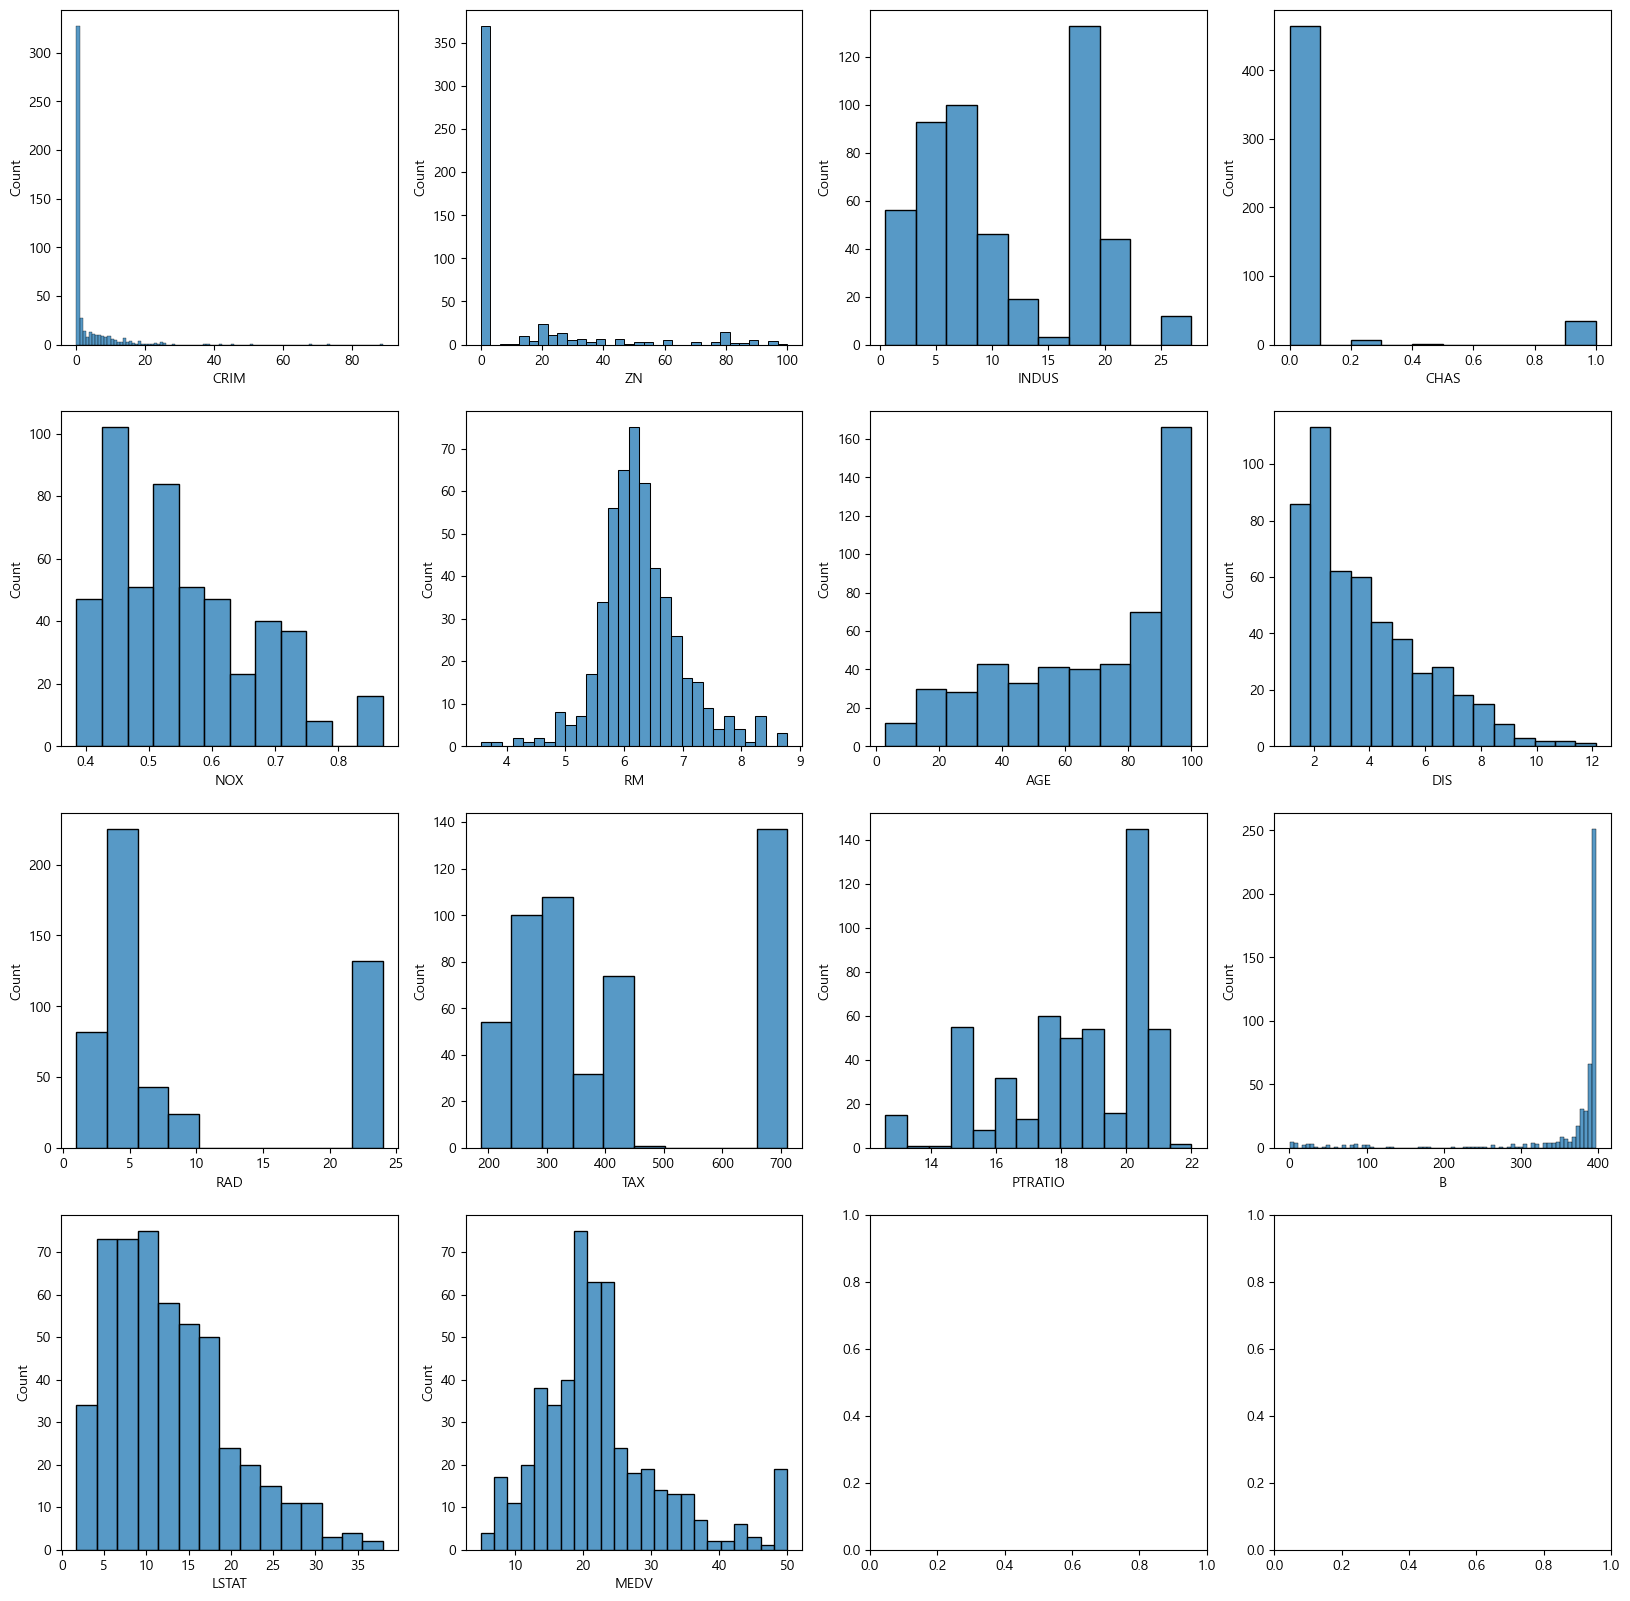

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
#sns.scatterplot(data=df, x=df.CRIM, y=df.MEDV)
for i, col_name in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(x=df[col_name], ax=ax)

In [21]:
data_input = df.drop(['MEDV'], axis=1).to_numpy()
data_target = df.MEDV

In [22]:
train_data, test_data, train_target, test_target = train_test_split(
    data_input, data_target, train_size=0.7, random_state=42
)

## 모델 생성, 학습, 분석

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()

In [25]:
rf.fit(train_data, train_target)

RandomForestRegressor()

In [26]:
print(rf.score(train_data, train_target))
print(rf.score(test_data, test_target))

0.976049469468897
0.8752407322152653


<Axes: >

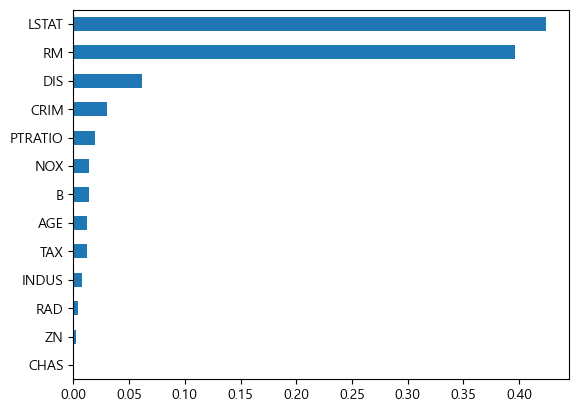

In [27]:
feature_importance = pd.Series(rf.feature_importances_, index=df.columns[:13])
feature_importance.sort_values(ascending=True).plot(kind="barh")

## 예측

In [28]:
train_pred = rf.predict(train_data[:5])
test_pred = rf.predict(test_data[:5])

In [29]:
print(train_pred)
print(test_pred)

[26.763 21.222 19.594 22.292 18.02 ]
[22.848 31.11  16.98  23.735 16.673]


In [30]:
train_pred = rf.predict(train_data)
test_pred = rf.predict(test_data)

Text(0, 0.5, 'real')

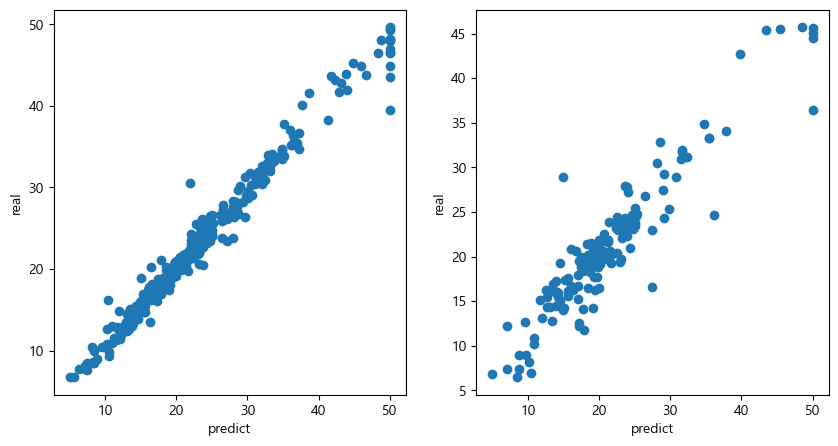

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_target, train_pred) #학습 데이터의 실제값(train_target)과 예측값(train_pred) 사이의 산점도를 첫 번째 subplot에 그립니다.
axes[0].set_xlabel("predict") #x축에 "predict"를 설정
axes[0].set_ylabel("real") #y축에 "real"을 설정

axes[1].scatter(test_target, test_pred) #테스트 데이터의 실제값(test_target)과 예측값(test_pred) 사이의 산점도를 두 번째 subplot에 그립니다.
axes[1].set_xlabel("predict") #x축에 "predict"를 설정
axes[1].set_ylabel("real") #y축에 "real"을 설정

## 평가

In [32]:
from sklearn.metrics import mean_squared_error 

In [33]:
train_mse = mean_squared_error(train_target, train_pred) #학습 데이터의 실제값(train_target)과 예측값(train_pred) 사이의 평균 제곱 오차(MSE)를 계산하고, train_mse 변수에 할당
test_mse = mean_squared_error(test_target, test_pred) #테스트 데이터의 실제값(test_target)과 예측값(test_pred) 사이의 평균 제곱 오차(MSE)를 계산하고, test_mse 변수에 할당

print(f"train mean squared error is {train_mse:.4f}") #학습 데이터의 평균 제곱 오차를 소수점 아래 4자리까지 출력
print(f"test mean squared error is {test_mse:.4f}") #테스트 데이터의 평균 제곱 오차를 소수점 아래 4자리까지 출력

train mean squared error is 2.1052
test mean squared error is 9.2962


## 파라미터 튜닝

In [34]:
from sklearn.model_selection import GridSearchCV

* n_strimators : 몇개의 트리를 사용할지 여부
* criterion : 감소시킬 평가 지표
    * mae : Mean Absolute Error(절대 평균 오차 - 예측 값과 실제 값 간의 차이를 측정하는 지표)
    * mse : Mean Squared Error(평균 제곱 오차 - 예측 값과 실제 값 간의 제곱 차이의 평균)
* max_depth

In [35]:
params = {
    "n_estimators": [100, 200, 500, 1000],
    "criterion": ["squared_error", "friedman_mse"],
    "max_depth": [i for i in range(1, 10, 2)],
}

In [36]:
grid = GridSearchCV(estimator=rf, param_grid=params, cv=3)
grid = grid.fit(train_data, train_target)
print(f"Best score of paramter search is: {grid.best_score_:.4f}")

print("Best parameter of best score is")
for key, value in grid.best_params_.items():
    print(f"\t {key}: {value}")

Best score of paramter search is: 0.8013
Best parameter of best score is
	 criterion: squared_error
	 max_depth: 7
	 n_estimators: 100


## 최적의 모델로 평가

In [37]:
best_rf = grid.best_estimator_

In [38]:
print(best_rf.score(train_data, train_target))
print(best_rf.score(test_data, test_target))

0.9616528463310322
0.8673914873526687


Text(0, 0.5, 'real')

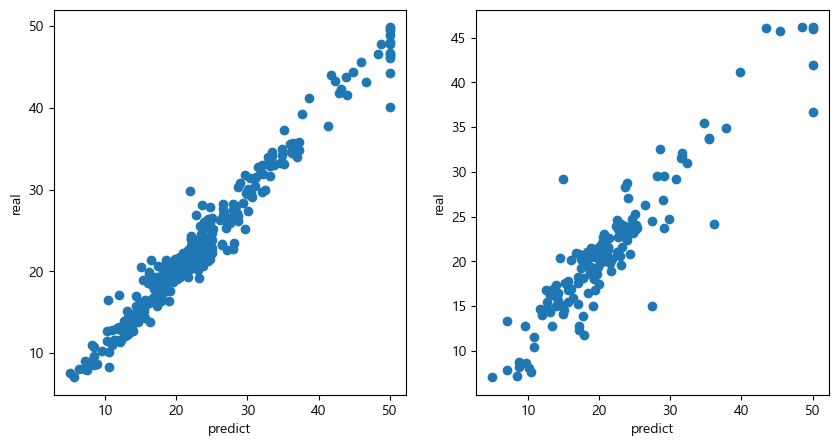

In [39]:
cv_train_pred = best_rf.predict(train_data)
cv_test_pred = best_rf.predict(test_data)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_target, cv_train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(test_target, cv_test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

In [40]:
from sklearn.tree import export_graphviz
import graphviz

In [47]:
print(rf.estimators_)

estimator = rf.estimators_[1]
export_graphviz(estimator, out_file='tree.dot',
                feature_names = df.columns[:13],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
                )

[DecisionTreeRegressor(max_features=1.0, random_state=1268495597), DecisionTreeRegressor(max_features=1.0, random_state=117163683), DecisionTreeRegressor(max_features=1.0, random_state=1201619899), DecisionTreeRegressor(max_features=1.0, random_state=373619448), DecisionTreeRegressor(max_features=1.0, random_state=383941316), DecisionTreeRegressor(max_features=1.0, random_state=1410343130), DecisionTreeRegressor(max_features=1.0, random_state=246992100), DecisionTreeRegressor(max_features=1.0, random_state=501270929), DecisionTreeRegressor(max_features=1.0, random_state=514529962), DecisionTreeRegressor(max_features=1.0, random_state=1992028522), DecisionTreeRegressor(max_features=1.0, random_state=647351328), DecisionTreeRegressor(max_features=1.0, random_state=650890607), DecisionTreeRegressor(max_features=1.0, random_state=1655055426), DecisionTreeRegressor(max_features=1.0, random_state=857688701), DecisionTreeRegressor(max_features=1.0, random_state=1269783784), DecisionTreeRegres

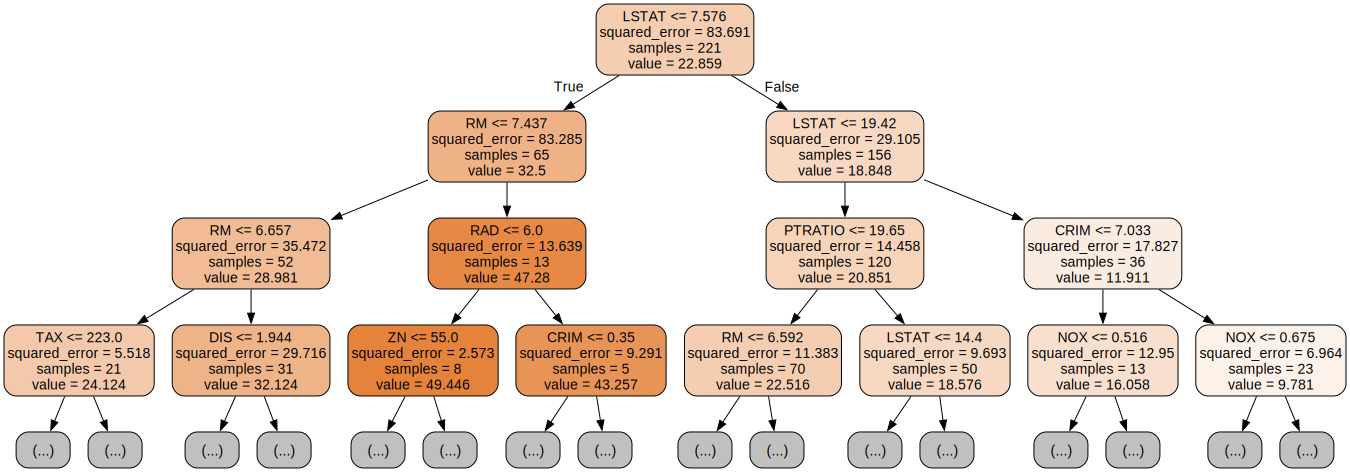

In [48]:
with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))